In [57]:
from e3nn import o3
import torch

In [58]:
# vector * vector
tp = o3.FullTensorProduct('1o', '1o')
tp

FullTensorProduct(1x1o x 1x1o -> 1x0e+1x1e+1x2e | 3 paths | 0 weights)

In [59]:
tp(torch.tensor([1., 2., 3.]), torch.tensor([4., 5., 6.]))

tensor([18.4752, -2.1213,  4.2426, -2.1213, 12.7279,  9.1924, -0.8165, 19.0919,
         9.8995])

In [60]:
tp = o3.FullTensorProduct('1o', '1o', ['2e'])  # only output 2e
tp(torch.tensor([1., 2., 3.]), torch.tensor([4., 5., 6.]))

tensor([12.7279,  9.1924, -0.8165, 19.0919,  9.8995])

In [61]:
def spherical_harmonics_2(x):
    return o3.FullTensorProduct('1o', '1o', ['2e'])(x, x)

def spherical_harmonics_3(x):
    y2 = spherical_harmonics_2(x)  # 2e
    return o3.FullTensorProduct('2e', '1o', ['3o'])(y2, x)

In [62]:
spherical_harmonics_3(torch.tensor([1., 2., 3.]))

tensor([ 13.0000,  14.6969,   2.3238, -13.9140,   6.9714,  19.5959,   9.0000])

In [63]:
irreps_in = o3.Irreps('1o')
irreps_out = o3.Irreps('3o')

angles = o3.rand_angles()
angles

(tensor(1.4694), tensor(1.2839), tensor(4.6273))

In [64]:
irreps_in.D_from_angles(*angles)

tensor([[ 0.2719,  0.9542, -0.1248],
        [-0.9556,  0.2830,  0.0815],
        [ 0.1131,  0.0971,  0.9888]])

In [15]:
irreps_out.D_from_angles(*angles)

tensor([[ 0.2649,  0.0546, -0.2463,  0.2206,  0.3830,  0.6308,  0.5224],
        [-0.6287,  0.0924,  0.0760,  0.7128,  0.1963,  0.0781, -0.1942],
        [ 0.3482, -0.4746, -0.0076,  0.4085, -0.5507,  0.3194, -0.2851],
        [-0.3068,  0.5390, -0.2382, -0.2471, -0.5213,  0.4666, -0.0898],
        [ 0.1339,  0.2557, -0.4113,  0.4021, -0.3575, -0.5206,  0.4324],
        [ 0.1813,  0.0599, -0.7172, -0.0113,  0.3241, -0.0721, -0.5821],
        [-0.5180, -0.6354, -0.4396, -0.2314, -0.0827,  0.0064,  0.2725]])

In [19]:
x = irreps_in.randn(100, -1)
x.shape

torch.Size([100, 3])

In [20]:
irreps_in.dim

3

In [21]:
spherical_harmonics_3(x).shape

torch.Size([100, 7])

In [25]:
# rotate first
out1 = spherical_harmonics_3(torch.einsum("ij,zj->zi", irreps_in.D_from_angles(*angles), x))

# rotate second
out2 = torch.einsum("ij,zj->zi", irreps_out.D_from_angles(*angles), spherical_harmonics_3(x))

In [32]:
(out1 - out2).abs().max()

tensor(9.9301e-05)

In [36]:
tp = o3.FullTensorProduct('1o', '1o')
tp.visualize()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [37]:
tp = o3.FullTensorProduct('1o', '1o', ['1e'])
tp.visualize()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [38]:
tp = o3.FullyConnectedTensorProduct('1o', '1o', '1e')
tp.visualize()

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [42]:
tp = o3.FullyConnectedTensorProduct('1o + 1o', '1o + 1o', '1e')
tp.visualize(plot_weight=False)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

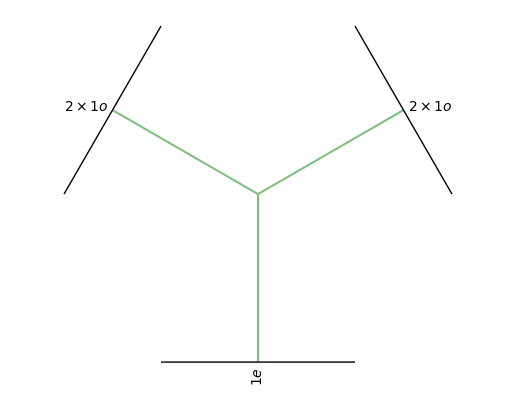

In [44]:
tp = o3.FullyConnectedTensorProduct('2x1o', '2x1o', '1e')  # 上のセルよりこっちのほうが、more efficient
tp.visualize(plot_weight=False)

In [47]:
tp.weight

Parameter containing:
tensor([ 0.9353, -0.0378, -0.3231, -1.2480], requires_grad=True)

# Reduce Tensor Product

In [48]:
o3.ReducedTensorProducts("ij=ji", i='1o')

ReducedTensorProducts(
    in: 1x1o times 1x1o
    out: 1x0e+1x2e
)

In [51]:
o3.ReducedTensorProducts("ij=ji", i='1o').change_of_basis.shape

torch.Size([6, 3, 3])

In [52]:
o3.ReducedTensorProducts("ij=ji", i='1o').irreps_out

1x0e+1x2e

In [55]:
o3.ReducedTensorProducts("ijkl=jikl=klij", i='1o')

ReducedTensorProducts(
    in: 1x1o times 1x1o times 1x1o times 1x1o
    out: 2x0e+2x2e+1x4e
)

In [56]:
o3.ReducedTensorProducts("ijkl=jikl=klij", i='1o').irreps_out.dim

21